In [287]:
import pandas as pd
import numpy as np

In [289]:
df = pd.read_csv("C:/Users/zeafa/Laptop Price Predictor/laptop_data.csv")

In [291]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [293]:
df.shape

(1303, 12)

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


**Check For Duplicates**

In [298]:
df.duplicated().sum()

0

**Check Null Values**

In [301]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

**Drop Unnamed Column**

In [304]:
df.drop(columns=['Unnamed: 0'],inplace=True)

**Convert *Ram* and *Weight* columns to Integer**

In [307]:
df['Ram'] = df['Ram'].str.replace("GB","")
df['Weight'] = df['Weight'].str.replace("kg","")

In [308]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [309]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## Exploratory Data Analysis *(Univariate Analysis)*

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\zeafa\AppData\Local\Temp\ipykernel_29940\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])
C:\Users\zeafa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

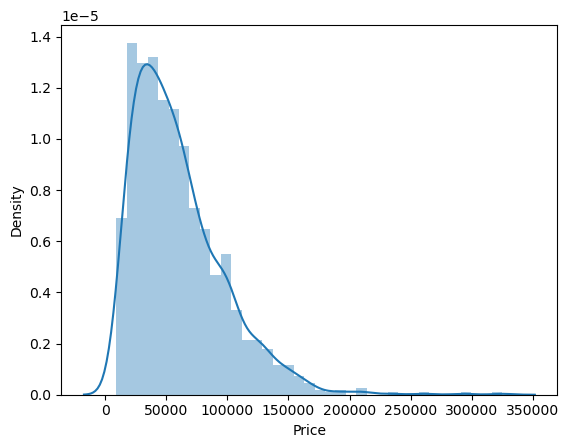

In [314]:
sns.distplot(df['Price'])

**Function to make Barplot**

In [316]:

def barplot(x,y):
    sns.barplot(x=x,y=y)
    plt.xticks(rotation='vertical')
    plt.show()
    return barplot

**Function to make countplot**

In [322]:
def countplot(x):
    x.value_counts().plot(kind='bar')
    return countplot

<function __main__.countplot(x)>

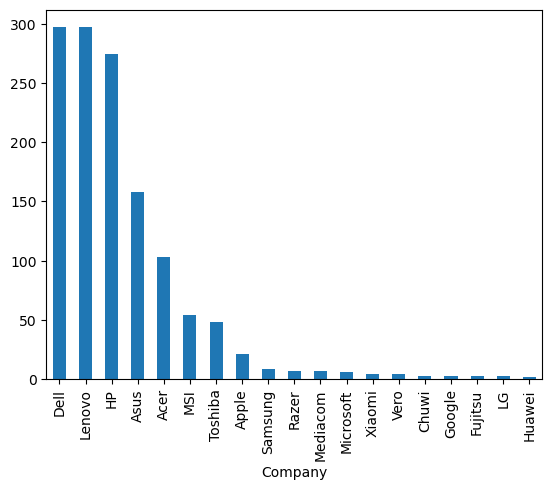

In [325]:
countplot(df['Company'])

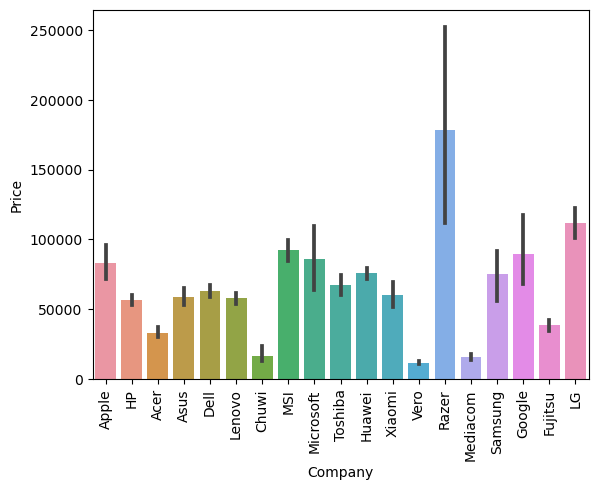

<function __main__.barplot(x, y)>

In [326]:
barplot(df['Company'],df['Price'])

<function __main__.countplot(x)>

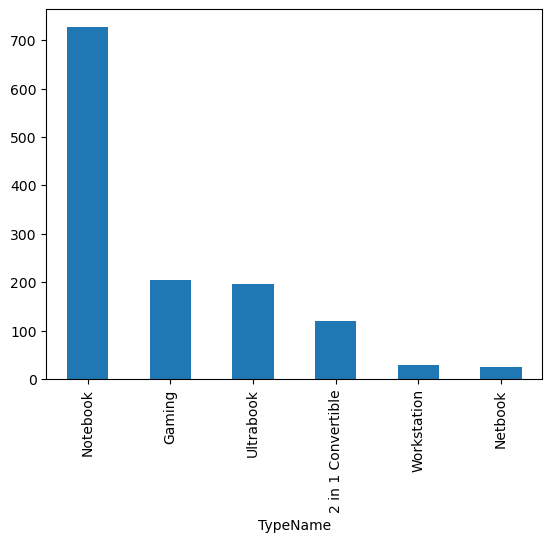

In [327]:
countplot(df['TypeName'])

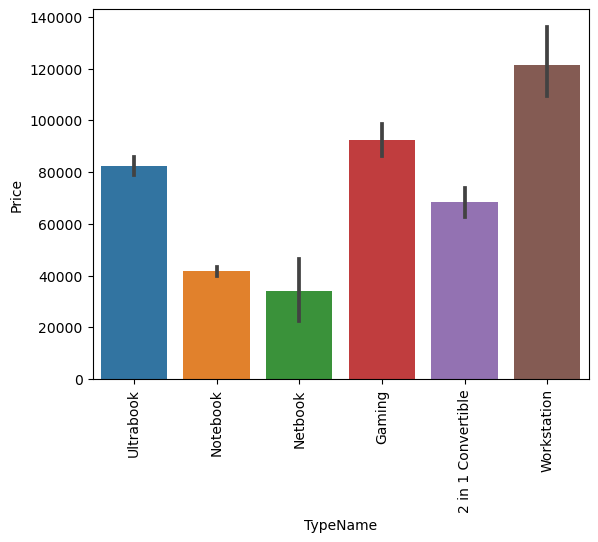

<function __main__.barplot(x, y)>

In [328]:
barplot(df['TypeName'],df['Price'])

In [329]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


<function __main__.countplot(x)>

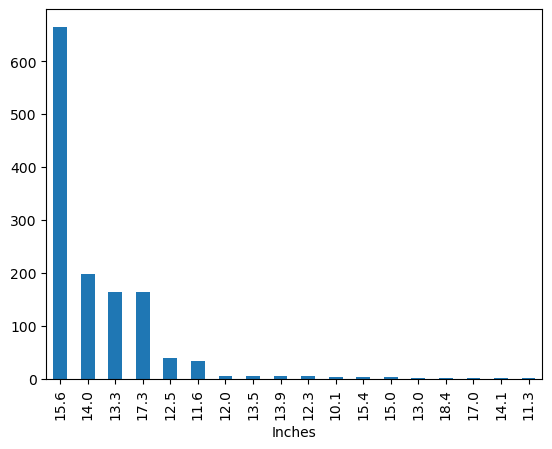

In [330]:
countplot(df['Inches'])

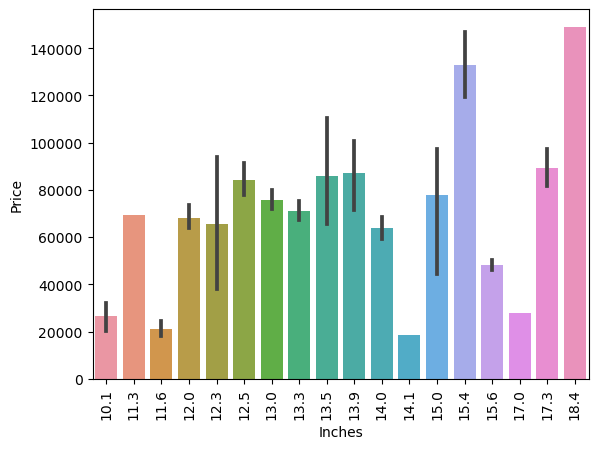

<function __main__.barplot(x, y)>

In [331]:
barplot(df['Inches'],df['Price'])

<Axes: xlabel='Inches', ylabel='Price'>

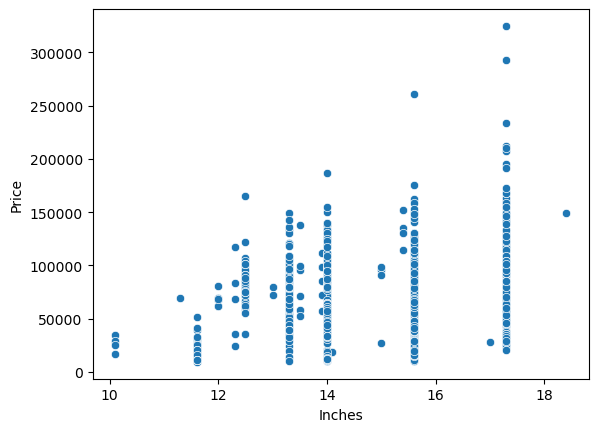

In [333]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [335]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


In [336]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [337]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [338]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
432,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.700,31914.7200,0
57,Asus,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.000,31232.2032,0
1213,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.191,53226.7200,1
635,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.990,48304.7136,0
678,LG,Ultrabook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.090,122490.7200,0


<function __main__.countplot(x)>

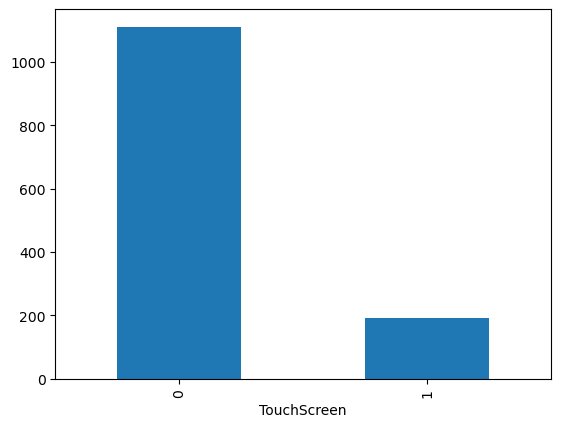

In [339]:
countplot(df['TouchScreen'])

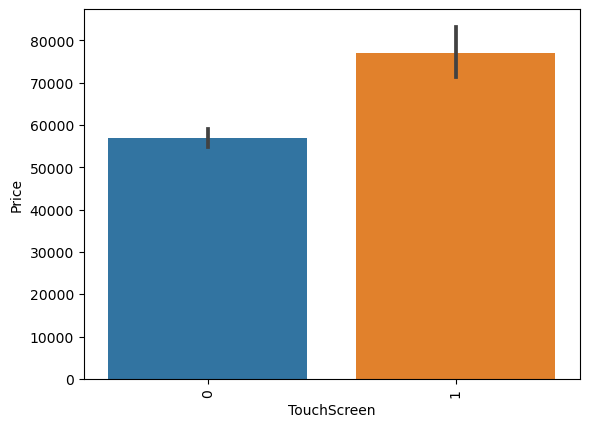

<function __main__.barplot(x, y)>

In [340]:
barplot(df['TouchScreen'],df['Price'])

In [341]:
df['ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [344]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<function __main__.countplot(x)>

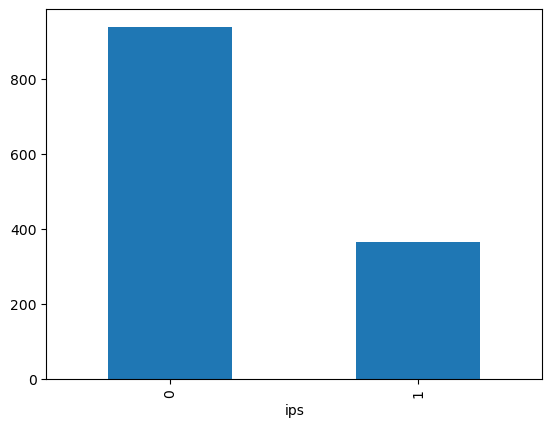

In [345]:
countplot(df['ips'])

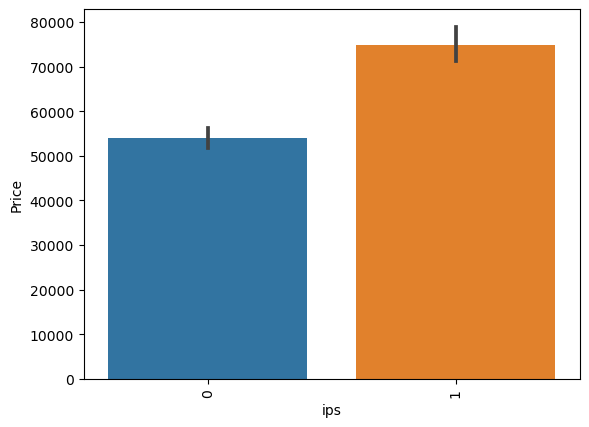

<function __main__.barplot(x, y)>

In [346]:
barplot(df['ips'],df['Price'])

In [347]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [348]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [349]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [350]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [351]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [353]:
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [355]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64','int32'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Get correlation of 'Price' with other numeric columns
price_correlation = correlation_matrix['Price']
print(price_correlation)

Inches         0.068197
Ram            0.743007
Price          1.000000
TouchScreen    0.191226
ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64


In [359]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [361]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [362]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64','int32','int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Get correlation of 'Price' with other numeric columns
price_correlation = correlation_matrix['Price']
print(price_correlation)

Inches         0.068197
Ram            0.743007
Price          1.000000
TouchScreen    0.191226
ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64


In [363]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [364]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [365]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [366]:
def fetchprocessor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return "Other Intel Processors"
        else:
            return "AMD Processors"
            

In [367]:
df['Cpu brand'] = df['Cpu Name'].apply(fetchprocessor)

In [370]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,ips,ppi,Cpu Name,Cpu brand
664,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,79215.1056,0,0,127.335675,Intel Core i7,Intel Core i7
547,Lenovo,Notebook,Intel Core i5 6200U 2.3GHz,4,1TB HDD,Intel HD Graphics 520,No OS,2.15,24634.0080,0,0,141.211998,Intel Core i5,Intel Core i5
1221,MSI,Gaming,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.20,78647.1408,0,0,141.211998,Intel Core i7,Intel Core i7
142,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050M,No OS,2.40,46300.3200,0,1,141.211998,Intel Core i7,Intel Core i7
932,HP,Notebook,Intel Celeron Dual Core N3060 1.6GHz,4,1TB HDD,Intel HD Graphics 400,No OS,1.86,15392.5920,0,0,100.454670,Intel Celeron Dual,Other Intel Processors


<function __main__.countplot(x)>

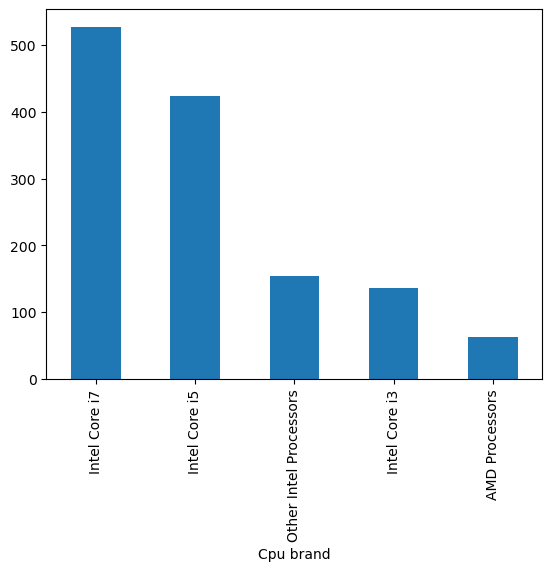

In [377]:
countplot(df['Cpu brand'])

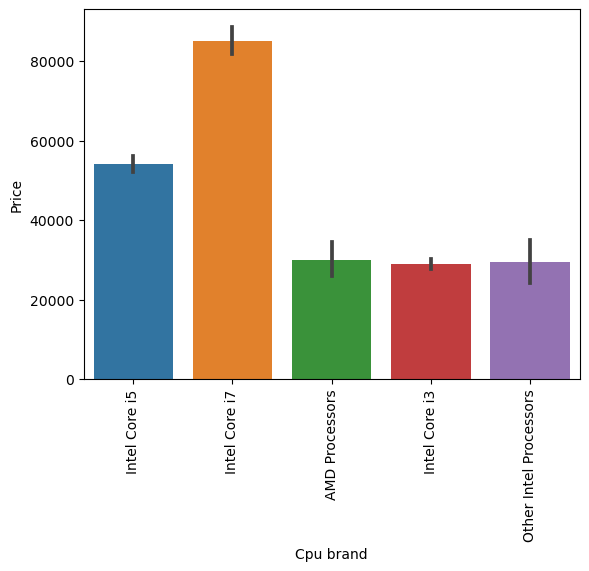

<function __main__.barplot(x, y)>

In [378]:
barplot(df['Cpu brand'],df['Price'])

In [379]:
df.drop(columns =["Cpu","Cpu Name"],inplace=True)

In [380]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<function __main__.countplot(x)>

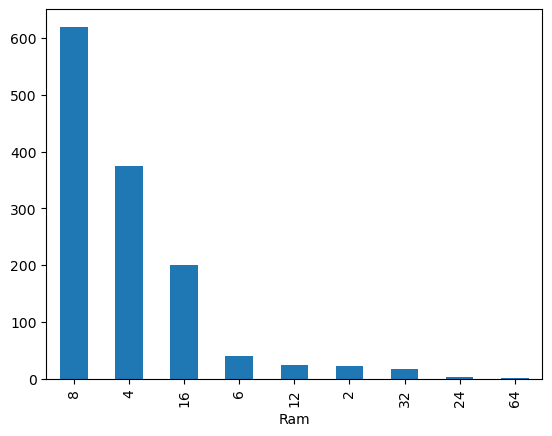

In [381]:
countplot(df['Ram'])

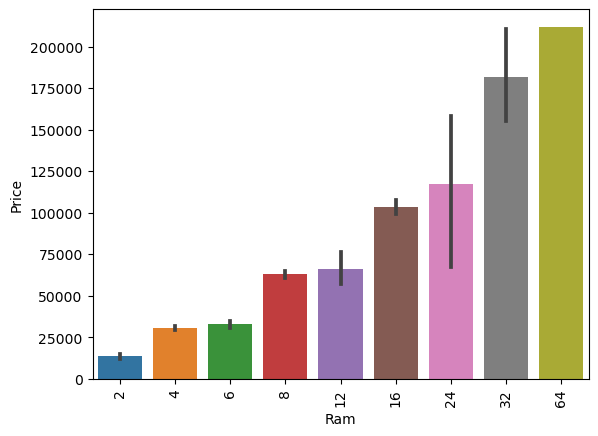

<function __main__.barplot(x, y)>

In [382]:
barplot(df['Ram'],df['Price'])

In [383]:
import re

# Function to extract storage sizes for different types
def extract_storage(memory_value, storage_type):
    patterns = {
        "SSD": r'(\d+TB|\d+GB) SSD',
        "HDD": r'(\d+TB|\d+GB) HDD',
        "Hybrid": r'(\d+TB|\d+GB) Hybrid',
        "Flash Storage": r'(\d+TB|\d+GB) Flash Storage'
    }
    
    matches = re.findall(patterns[storage_type], str(memory_value))  # Ensure it's a string
    total_size = 0
    
    for match in matches:
        if "TB" in match:
            total_size += int(match.replace("TB", "")) * 1000  # Convert TB to GB
        else:
            total_size += int(match.replace("GB", ""))  # Keep GB as is

    return total_size

# Create new columns for different storage types (without affecting other columns)
df = df.copy()  # Ensure we do not modify the original DataFrame reference

df["SSD"] = df["Memory"].apply(lambda x: extract_storage(x, "SSD"))
df["HDD"] = df["Memory"].apply(lambda x: extract_storage(x, "HDD"))
df["Hybrid"] = df["Memory"].apply(lambda x: extract_storage(x, "Hybrid"))
df["Flash Storage"] = df["Memory"].apply(lambda x: extract_storage(x, "Flash Storage"))

# Display the updated DataFrame with all original columns unchanged


In [384]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,ips,ppi,Cpu brand,SSD,HDD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,0,0


In [385]:
df.drop(columns=['Memory'],inplace=True)

In [386]:
df.head(1)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,ips,ppi,Cpu brand,SSD,HDD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,0,0


In [387]:
# Function to calculate correlation of numeric columns with Price
def price_corr(x):
    numeric = x.select_dtypes(include=['float','int32','int64'])
    return numeric.corr()['Price']

In [390]:
price_corr(df)

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
ips              0.252208
ppi              0.473487
SSD              0.670799
HDD             -0.095475
Hybrid          -0.004826
Flash Storage   -0.040511
Name: Price, dtype: float64

In [402]:
df.drop(columns=['Flash Storage','Hybrid'],inplace=True)

In [403]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,ips,ppi,Cpu brand,SSD,HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0


In [404]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [405]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,ips,ppi,Cpu brand,SSD,HDD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel


<function __main__.countplot(x)>

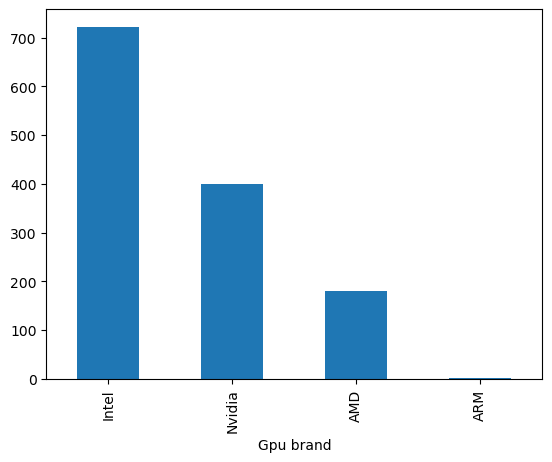

In [413]:
countplot(df['Gpu brand'])

In [415]:
df= df[df['Gpu brand']!='ARM']

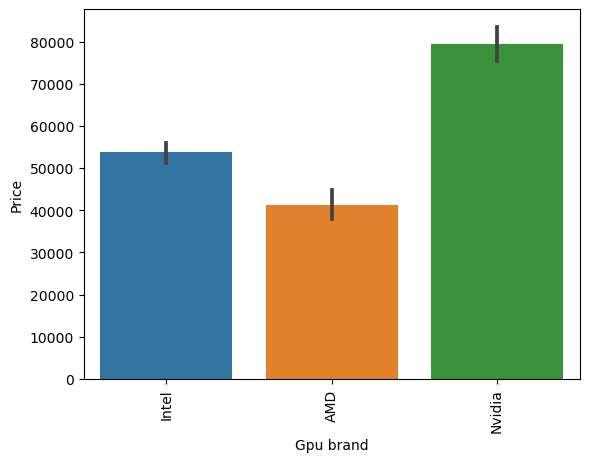

<function __main__.barplot(x, y)>

In [416]:
barplot(df['Gpu brand'],df['Price'])

In [417]:
df.drop(columns=['Gpu'],inplace=True)

In [418]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,ips,ppi,Cpu brand,SSD,HDD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel


<function __main__.countplot(x)>

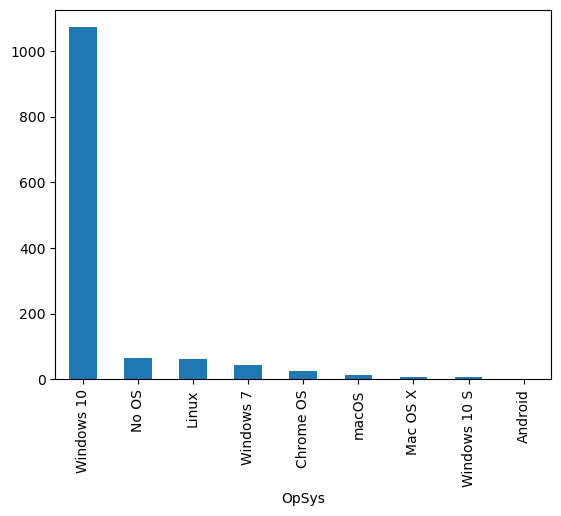

In [420]:
countplot(df['OpSys'])

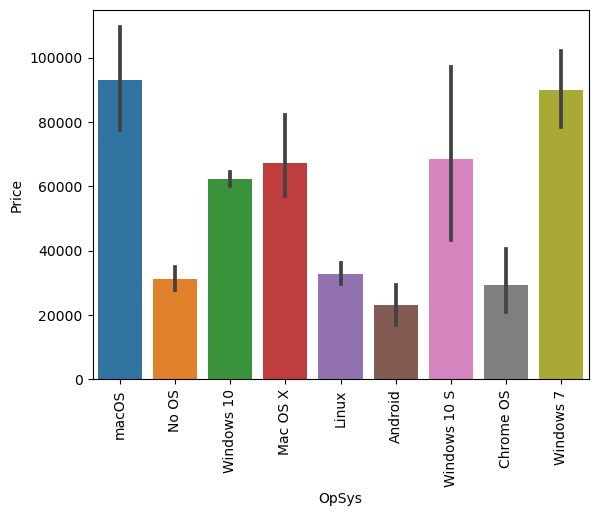

<function __main__.barplot(x, y)>

In [425]:
barplot(df['OpSys'],df['Price'])

In [426]:
def cat_os(inp):
    if inp =='Windows 10' or inp=='Windows 7' or inp=='Windows 10 S':
        return 'Windows'
    elif inp=='macOS' or inp=='Mac OS X':
        return "Mac"
    else:
        return "Others/No OS/Linux"

In [427]:
df['os'] = df['OpSys'].apply(cat_os)

In [435]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,ips,ppi,Cpu brand,SSD,HDD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel,Mac


In [436]:
df.drop(columns=['OpSys'],inplace=True)

<function __main__.countplot(x)>

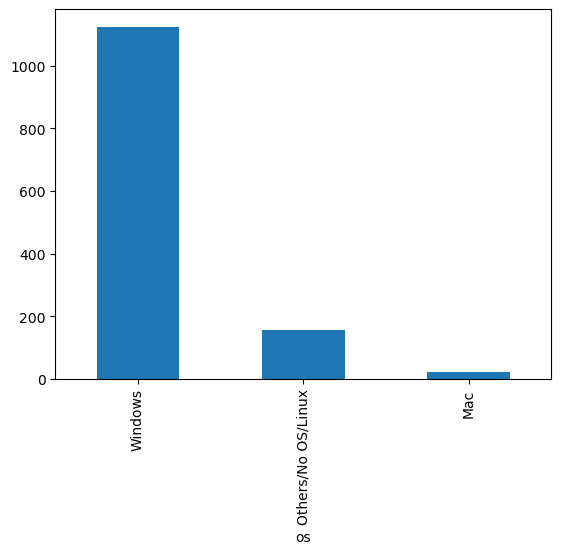

In [437]:
countplot(df['os'])

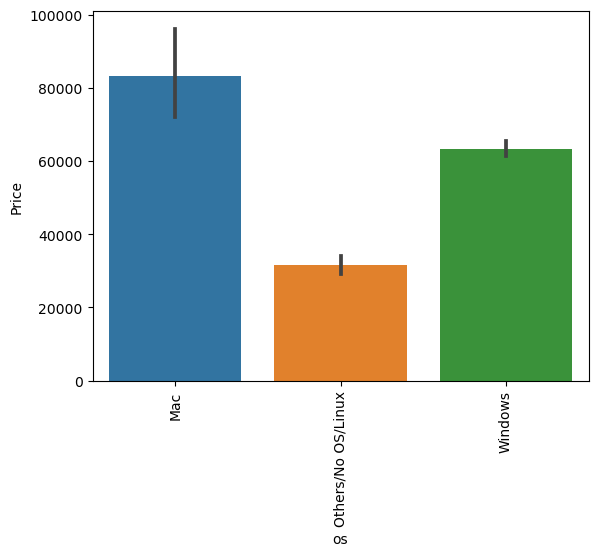

<function __main__.barplot(x, y)>

In [442]:
barplot(df['os'],df['Price'])

In [443]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,TouchScreen,ips,ppi,Cpu brand,SSD,HDD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac


C:\Users\zeafa\AppData\Local\Temp\ipykernel_29940\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])
C:\Users\zeafa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Density'>

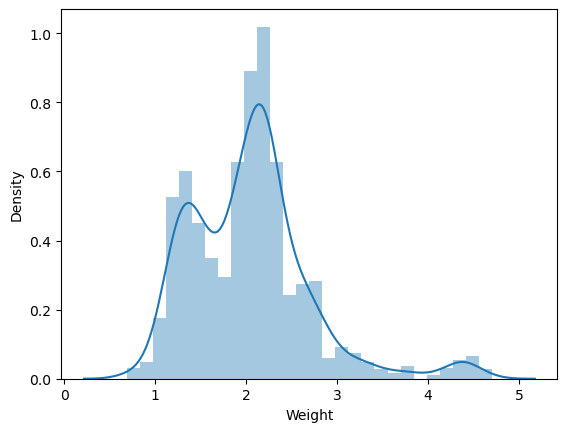

In [444]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

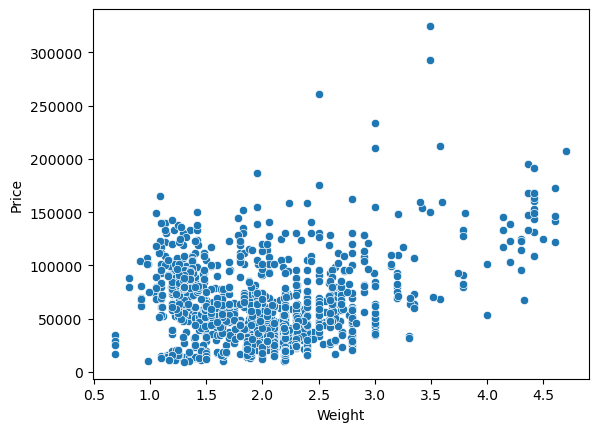

In [447]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [452]:
price_corr(df)

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
ips            0.253320
ppi            0.475368
SSD            0.670660
HDD           -0.095924
Name: Price, dtype: float64

In [453]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,ips,ppi,Cpu brand,SSD,HDD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel,Mac


C:\Users\zeafa\AppData\Local\Temp\ipykernel_29940\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))
C:\Users\zeafa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

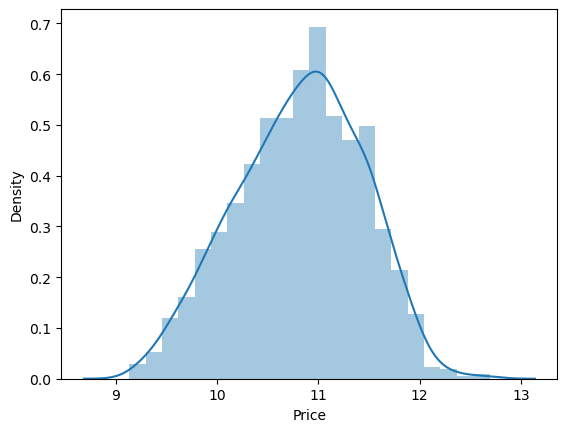

In [454]:
sns.distplot(np.log(df['Price']))

In [457]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,TouchScreen,ips,ppi,Cpu brand,SSD,HDD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac


In [492]:
X = df.drop(columns=['Price','Log_Price'])
y = np.log(df['Price'])

In [494]:
X.head()

,Company,TypeName,Ram,Weight,TouchScreen,ips,ppi,Cpu brand,SSD,HDD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,256,0,Intel,Mac


In [496]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [498]:
from sklearn.model_selection import train_test_split

In [500]:
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, df['Log_Price'], test_size=0.2, random_state=42)


In [502]:
X_train.head()

,Company,TypeName,Ram,Weight,TouchScreen,ips,ppi,Cpu brand,SSD,HDD,Gpu brand,os
147,Asus,Notebook,4,2.00,0,0,141.211998,Other Intel Processors,0,1000,Intel,Windows
342,HP,Notebook,8,2.10,0,1,141.211998,Intel Core i3,0,1000,Nvidia,Windows
1003,HP,Notebook,4,1.64,0,0,111.935204,Intel Core i5,0,500,Intel,Windows
814,Dell,Notebook,8,2.18,0,0,141.211998,Intel Core i5,256,0,AMD,Windows
344,Dell,Ultrabook,8,1.20,0,0,165.632118,Intel Core i7,256,0,Intel,Windows


In [504]:
X_train.shape

(1041, 12)

In [506]:
y_train.shape

(1041,)

In [508]:
X_test.shape

(261, 12)

In [510]:
y_test.shape

(261,)

### Handle Categorical Variables

In [513]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [515]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

In [527]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
num_features = ['Ram', 'Weight', 'ppi', 'SSD', 'HDD']

# ColumnTransformer: OneHotEncode categorical + StandardScale numerical features
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']),
        ('num_scaler', StandardScaler(), num_features)  # Apply StandardScaler to numeric features
    ], 
    remainder='passthrough'
)

In [529]:
X_transformed = step1.fit_transform(X_train)  

## Linear Regressor

In [531]:

# Define pipeline
step2 = LinearRegression()
pipe = Pipeline([
    ('step1', step1),
  
    ('step2', step2)
])

# Fit model
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Performance evaluation
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.808147116937693
Mean Absolute Error: 0.2145899354669332


## Ridge Regression

In [534]:

# Define pipeline
step2 = Ridge(alpha=1)
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)


# Performance evaluation
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8084964672483518
Mean Absolute Error: 0.21470884939959856


## Lasso Regression

In [553]:

# Define pipeline
step2 = Lasso(alpha=0.001)
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Performance evaluation
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.805615387740633
Mean Absolute Error: 0.21683576788919215


## KNN

In [555]:

# Define pipeline
step2 = KNeighborsRegressor(n_neighbors=15)
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Performance evaluation
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8234730653952568
Mean Absolute Error: 0.2013195310057994


## Decision Tree Regression

In [557]:

# Define pipeline
step2 = SVR(kernel='rbf',C=1000,epsilon=0.3)
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Performance evaluation
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8062333134883403
Mean Absolute Error: 0.21575777932533258


## Random Forest Regression

In [559]:

# Define pipeline
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15
                             )
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Performance evaluation
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8622145804812396
Mean Absolute Error: 0.17514027387086556


## Extra Tree

In [561]:

# Define pipeline
step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15
                             )
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Performance evaluation
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8691042769169425
Mean Absolute Error: 0.16899149841044314


## AdaBoost Regression

In [563]:
# Define pipeline
step2 = AdaBoostRegressor(n_estimators=100,
                            learning_rate=0.1)
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Performance evaluation
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.744665545834917
Mean Absolute Error: 0.25800160338255984


## Gradient Boost Regressor

In [565]:
# Define pipeline
step2 = GradientBoostingRegressor(n_estimators=100,
                                 max_depth=7)
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Performance evaluation
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8833144804211693
Mean Absolute Error: 0.15643332318438136


In [717]:
!pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 165.2 kB/s eta 0:15:08
   ---------------------------------------- 0.0/150.0 MB 187.9 kB/s eta 0:13:19
   ---------------------------------------- 0.0/150.0 MB 196.9 kB/s eta 0:12:42
   ---------------------------------------- 0.1/150.0 MB 201.8 kB/s eta 0:12:24
   ---------------------------------------- 0.1/150.0 MB 231.8 kB/s eta 0:10:47
   ---------------------------------------- 0.1/150.0 MB 309.1 kB/s eta 0:08:05
   ---------------------------------------- 0.1/150.0 MB 309.1 kB/s eta 0:08:05
   ---------------------------------------- 0.1/150.0 MB 309.1 kB/s eta 0:08:05
   ---------------------------------------- 0.1/150.0 MB 242.7 kB/s eta 0:10:18
   ---------------------------------------- 0.1/150.0 MB 240.7 kB/s 

## Xgboost

In [580]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=7)
pipe = Pipeline([('step1', step1), ('step2', xgb)])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8859977615435258
MAE: 0.1552105548880821


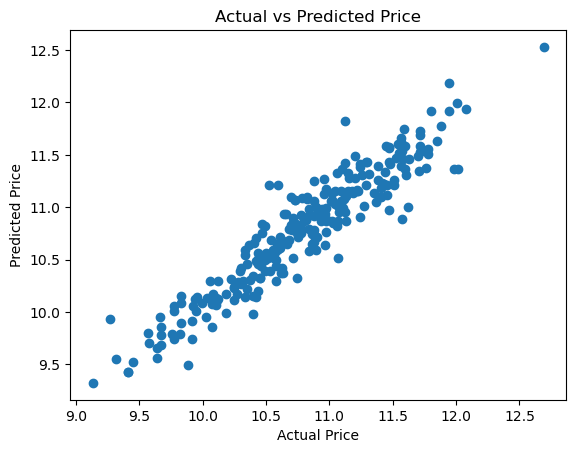

In [569]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()


## Exporting the Model

In [572]:
import pickle

In [582]:
pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('model_pipe.pkl','wb'))